In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import data

In [4]:
df = pd.read_csv("/home/yulius/Latihan-Data-Science/Data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Visualize Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

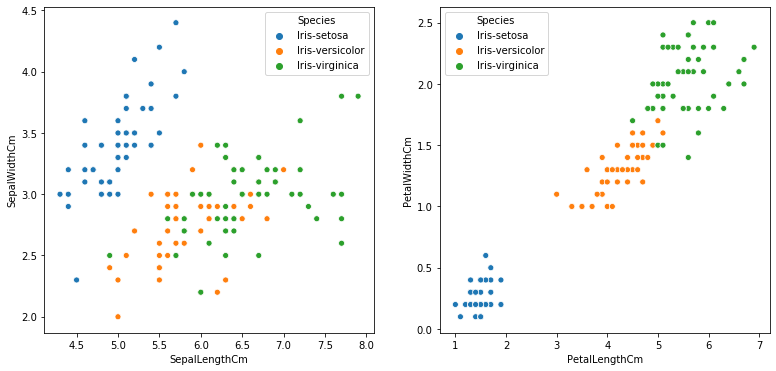

In [8]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.scatterplot("SepalLengthCm","SepalWidthCm",hue = "Species",data=df)
plt.subplot(122)
sns.scatterplot("PetalLengthCm","PetalWidthCm",hue = "Species",data=df)

# Dataset Spliting

In [9]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

# One vs Rest/ One vs All

In [17]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)  
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class="ovr",solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.9583333333333334 0.9500000000000001 0.9666666666666667


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.3s finished


# multinomial

In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)  
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class="multinomial",solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 0.9666666666666667 1.0


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    3.3s finished


# Clasification report

In [29]:
from jcopml.plot import plot_classification_report,plot_confusion_matrix

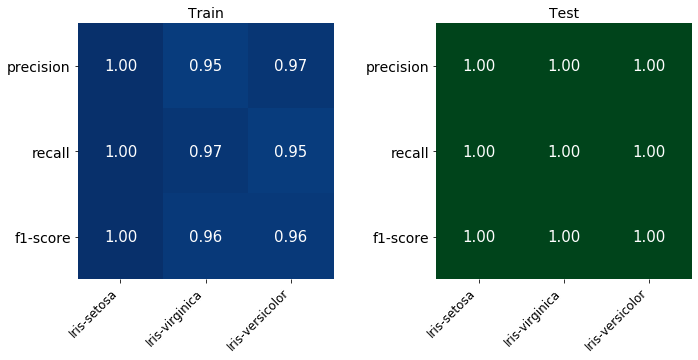

In [27]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [28]:
plot_classification_report(X_train, y_train, X_test, y_test, model,report=True)

Train report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       120
      macro avg       0.98      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120


Test report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Actual vs Prediction plot

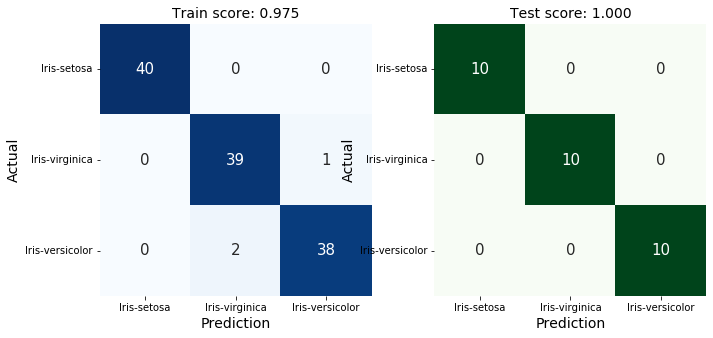

In [30]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)